In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [197]:
df = pd.read_csv('../../stacked_inner_pollution_data.csv')

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,5,6,7,8,10,11,14,16,17,18,19,20,21,22,23,24,25,26,27,28) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [198]:
df.head()

Date      Time                       Location  Carbon monoxide  \
0  2004-01-01  01:00:00       Ealing - Acton Town Hall          0.81494   
1  2004-01-01  01:00:00      Ealing - Ealing Town Hall              NaN   
2  2004-01-01  01:00:00  Ealing - Hanger Lane Gyratory              NaN   
3  2004-01-01  02:00:00       Ealing - Acton Town Hall          0.93136   
4  2004-01-01  02:00:00      Ealing - Ealing Town Hall              NaN   

  Nitric Oxide Nitrogen dioxide Non-volatile PM10 Non-volatile PM2.5  \
0          NaN            35.19               NaN                NaN   
1          NaN          18.5512               NaN                NaN   
2          NaN          46.8563               NaN                NaN   
3          NaN           17.595               NaN                NaN   
4          NaN          11.0925               NaN                NaN   

  Oxides of Nitrogen     Ozone  ... Status.2       Status.3  Status.4  \
0                NaN       NaN  ...  V mgm-3  V ugm-3 (VCM)   V ugm-3   
1                NaN  39.91400  ...  V ugm-3            NaN       NaN   
2                NaN       NaN  ...      NaN            NaN       NaN   
3                NaN       NaN  ...  V mgm-3  V ugm-3 (VCM)   V ugm-3   
4                NaN  54.48261  ...  V ugm-3            NaN       NaN   

   Status.5 Status.6  Status.7 Status.8 Status.9 Sulphur dioxide Volatile PM10  
0       NaN      NaN       NaN      NaN      NaN             NaN           NaN  
1       NaN      NaN       NaN      NaN      NaN        14.10277           NaN  
2       NaN      NaN       NaN      NaN      NaN             NaN           NaN  
3       NaN      NaN       NaN      NaN      NaN             NaN           NaN  
4       NaN      NaN       NaN      NaN      NaN        14.10277           NaN  

[5 rows x 31 columns]

## Units

PM10 Particulae Matter  --->   R ugm-3 (INDIC.GRAV)

Nitric Oxide  ---> R ugm-3

Nitrogen Dioxide ---> R ugm-3

Oxides of Nitrogen ---> R ugm-3

Sulpher Dioxide ---> R ugm-3

Non-volatile PM10 ---> R ugm-3 (INDIC.GRAV)

Non-volatile PM2.5 ---> R ugm-3

Ozone ---> R ugm-3

### Dropping units columns

In [199]:
unit_cols = [c for c in df.columns if "Status" in c]

In [200]:
df = df.drop(columns = unit_cols)

In [201]:
df['Date'] = pd.to_datetime(df['Date'])

In [202]:
cols = df.columns.drop(['Date', 'Time', 'Location'])
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [203]:
df.dtypes

Date                                          datetime64[ns]
Time                                                  object
Location                                              object
Carbon monoxide                                      float64
Nitric Oxide                                         float64
Nitrogen dioxide                                     float64
Non-volatile PM10                                    float64
Non-volatile PM2.5                                   float64
Oxides of Nitrogen                                   float64
Ozone                                                float64
PM1 Particulates                                     float64
PM10 Particulate matter                              float64
PM10 particulate matter (Hourly measured)            float64
PM2.5 Particulate matter                             float64
PM2.5 Particulate matter.1                           float64
PM2.5 particulate matter (Hourly measured)           float64
Sulphur dioxide         

In [204]:
df_hourly = df.copy()

In [205]:
df_daily = df_hourly.groupby(['Date', 'Location']).mean().reset_index()

In [206]:
df_daily.head()

Date                          Location  Carbon monoxide  Nitric Oxide  \
0 2004-01-01             Hounslow 2 - Cranford              NaN      4.130435   
1 2004-01-01   Hounslow 4 - Chiswick High Road              NaN     27.666667   
2 2004-01-01                Hounslow Brentford         0.558333     25.541667   
3 2004-01-01          Ealing - Acton Town Hall         0.834343           NaN   
4 2004-01-01         Ealing - Ealing Town Hall              NaN           NaN   

   Nitrogen dioxide  Non-volatile PM10  Non-volatile PM2.5  \
0         22.652174                NaN                 NaN   
1         47.875000                NaN                 NaN   
2         25.916667                NaN                 NaN   
3         38.106562                NaN                 NaN   
4         25.747031                NaN                 NaN   

   Oxides of Nitrogen     Ozone  PM1 Particulates  PM10 Particulate matter  \
0           28.565217       NaN               NaN                10.208333   
1           90.250000       NaN               NaN                21.416667   
2           65.083333       NaN               NaN                13.000000   
3                 NaN       NaN               NaN                      NaN   
4                 NaN  37.01192               NaN                      NaN   

   PM10 particulate matter (Hourly measured)  PM2.5 Particulate matter  \
0                                        NaN                       NaN   
1                                        NaN                       NaN   
2                                        NaN                       NaN   
3                                  22.454167                       NaN   
4                                        NaN                       NaN   

   PM2.5 Particulate matter.1  PM2.5 particulate matter (Hourly measured)  \
0                         NaN                                         NaN   
1                         NaN                                         NaN   
2                         NaN                                         NaN   
3                         NaN                                    8.258333   
4                         NaN                                         NaN   

   Sulphur dioxide  Volatile PM10  
0         1.000000            NaN  
1         1.583333            NaN  
2              NaN            NaN  
3              NaN            NaN  
4        13.304500            NaN

In [207]:
bucks = pd.read_csv('./buckinghamshire.csv').drop('Unnamed: 0', axis = 1)

In [208]:
bucks['Date'] = pd.to_datetime(bucks['Date'])

In [209]:
df_daily = pd.concat([df_daily, bucks])

In [210]:
pollutants = ['Carbon monoxide', 'Nitric Oxide',
       'Nitrogen dioxide', 'Non-volatile PM10', 'Non-volatile PM2.5',
       'Oxides of Nitrogen', 'Ozone', 'PM1 Particulates',
       'PM10 Particulate matter', 'PM10 particulate matter (Hourly measured)',
       'PM2.5 Particulate matter', 'PM2.5 Particulate matter.1',
       'PM2.5 particulate matter (Hourly measured)', 'Sulphur dioxide',
       'Volatile PM10']

In [12]:
# pollutants = ['Carbon monoxide', 'Ozone',
#        'PM10 particulate matter (Hourly measured)', 'PM2.5 Particulate matter',
#        'PM2.5 particulate matter (Hourly measured)', 'Sulphur dioxide',
#        'Volatile PM10', ]

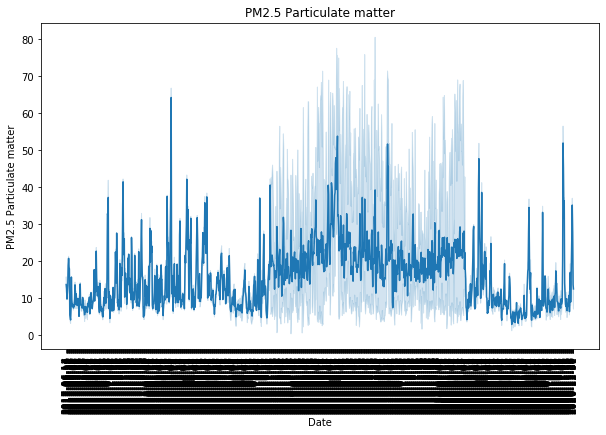

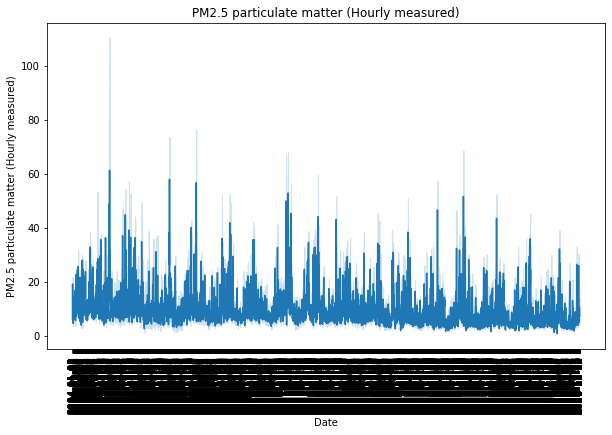

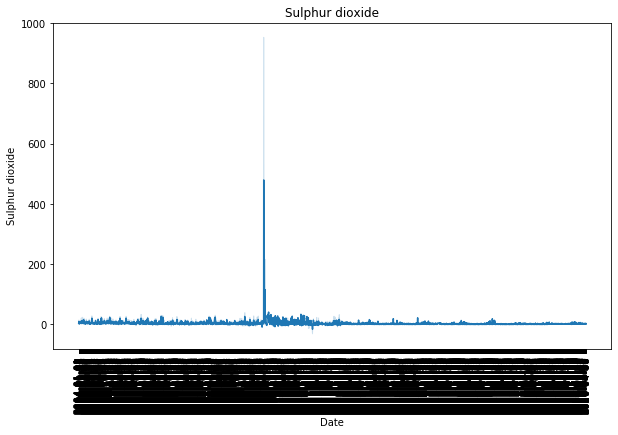

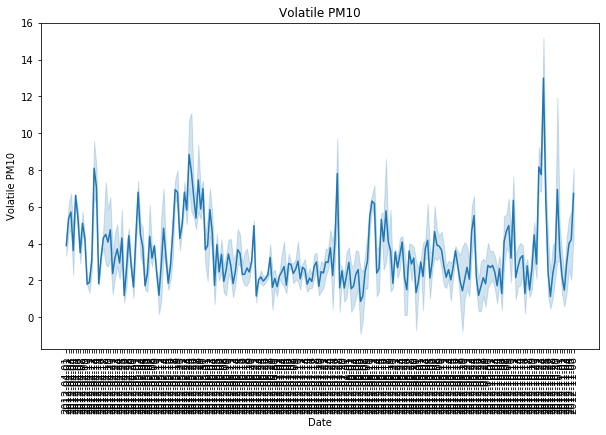

In [30]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_daily).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

In [211]:
df_monthly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='M')]).mean().reset_index()
df_quaterly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='Q')]).mean().reset_index()
df_yearly = df_daily.groupby(['Location', pd.Grouper(key='Date', freq='Y')]).mean().reset_index()
df_yearly.head()

Location       Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford 2004-12-31              NaN     19.366907   
1   Hounslow 2 - Cranford 2005-12-31              NaN     19.282252   
2   Hounslow 2 - Cranford 2006-12-31              NaN     16.322724   
3   Hounslow 2 - Cranford 2007-12-31              NaN     22.751626   
4   Hounslow 2 - Cranford 2008-12-31              NaN     19.463412   

   Nitrogen dioxide  Non-volatile PM10  Non-volatile PM2.5  \
0         35.637110                NaN                 NaN   
1         37.730687                NaN                 NaN   
2         37.439653                NaN                 NaN   
3         34.516199                NaN                 NaN   
4         36.025263                NaN                 NaN   

   Oxides of Nitrogen      Ozone  PM1 Particulates  PM10 Particulate matter  \
0           65.183649  31.628426               NaN                22.091612   
1           66.993132  34.426010               NaN                22.159977   
2           62.493307  41.626836               NaN                22.695308   
3           69.260681  31.764437               NaN                21.877800   
4           65.728967  36.527434               NaN                19.221030   

   PM10 particulate matter (Hourly measured)  PM2.5 Particulate matter  \
0                                        NaN                       NaN   
1                                        NaN                       NaN   
2                                        NaN                       NaN   
3                                        NaN                       NaN   
4                                        NaN                       NaN   

   PM2.5 Particulate matter.1  PM2.5 particulate matter (Hourly measured)  \
0                         NaN                                         NaN   
1                         NaN                                         NaN   
2                         NaN                                         NaN   
3                         NaN                                         NaN   
4                         NaN                                         NaN   

   Sulphur dioxide  Volatile PM10  
0         3.611565            NaN  
1         3.959997            NaN  
2         3.018580            NaN  
3         2.886371            NaN  
4         3.046298            NaN

### Monthly pollution levels from 2004 - 2020

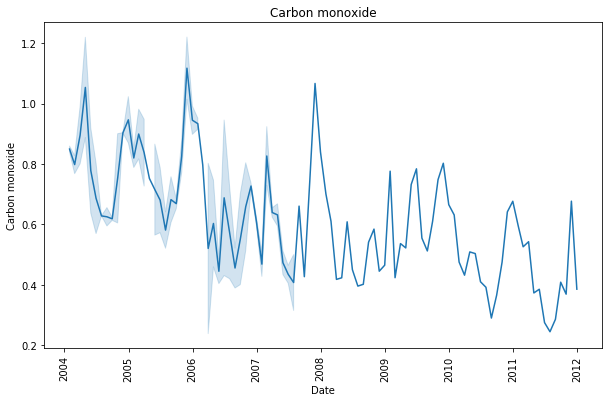

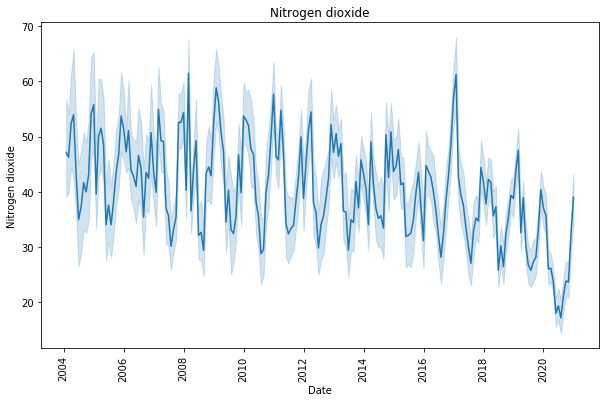

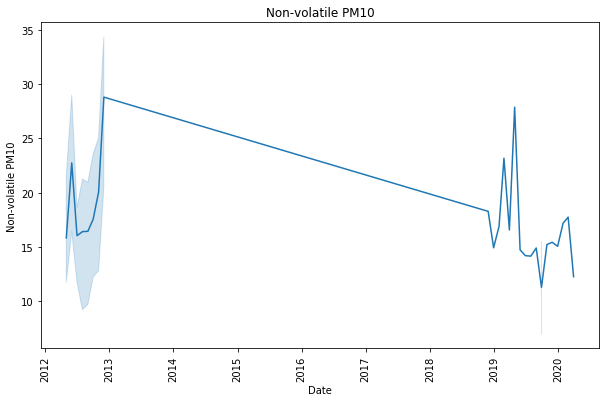

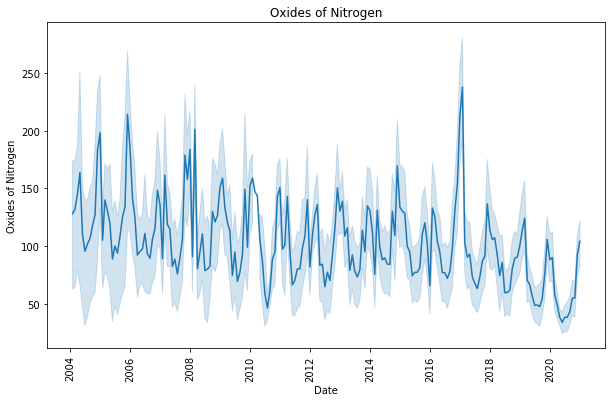

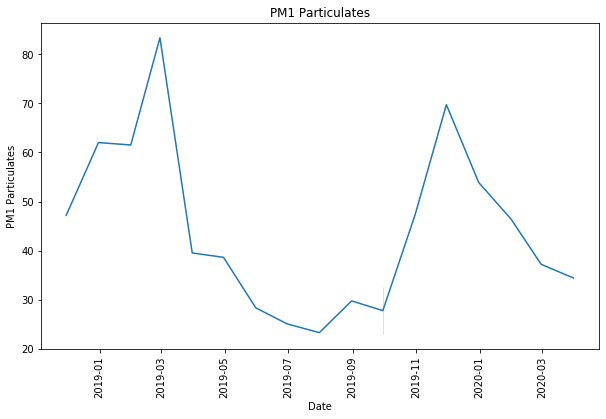

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


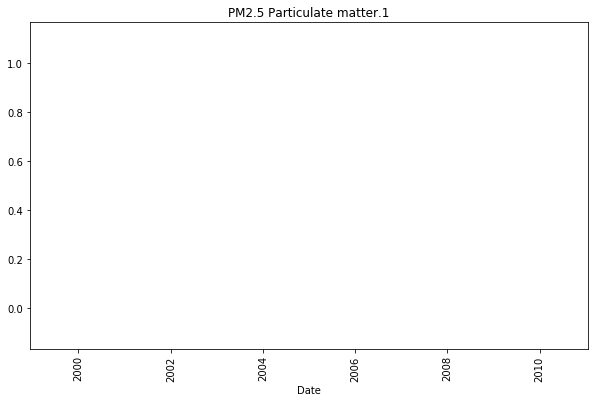

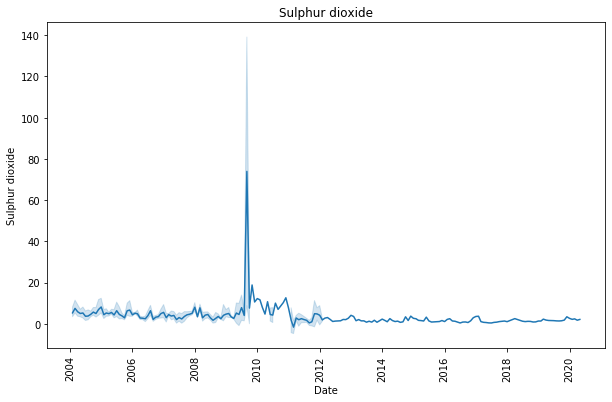

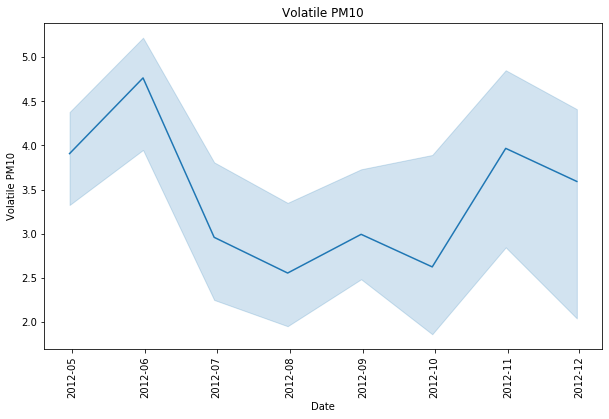

In [169]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_monthly).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

### Yearly pollution levels from 2004 - 2020

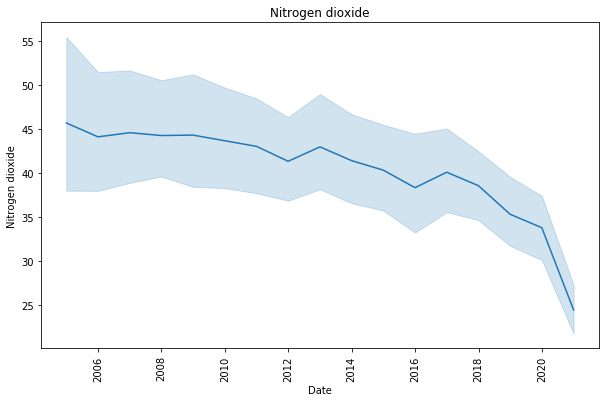

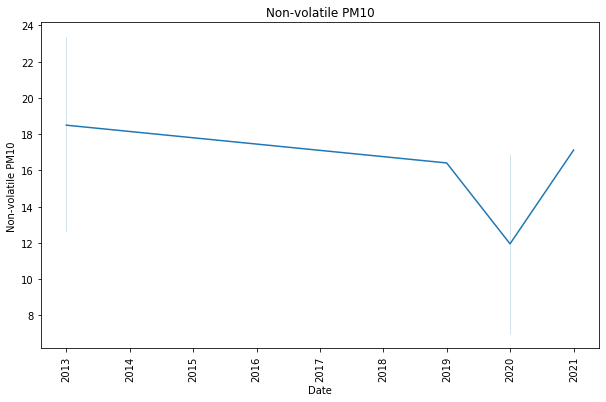

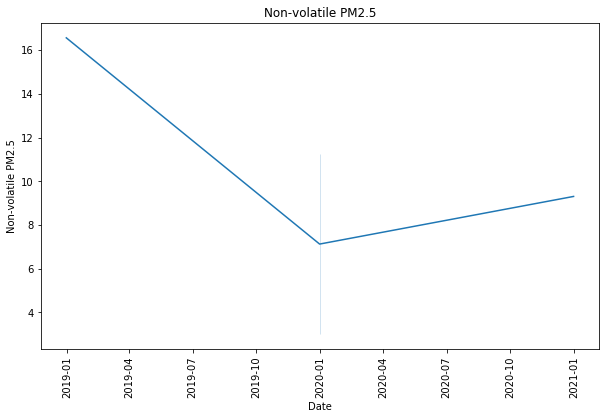

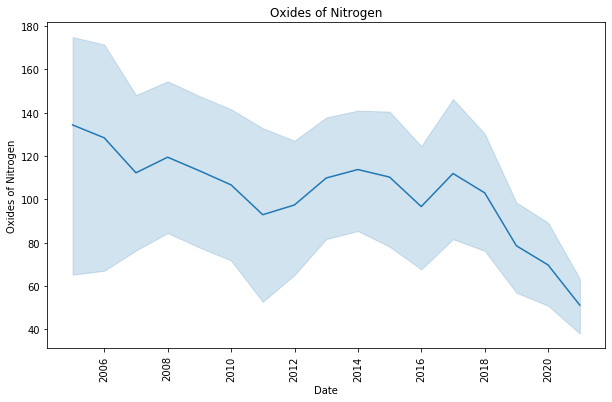

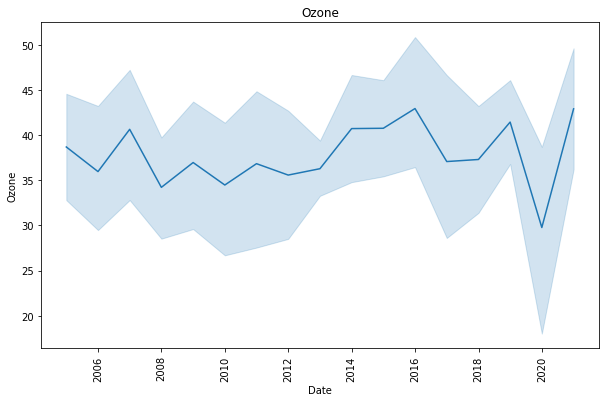

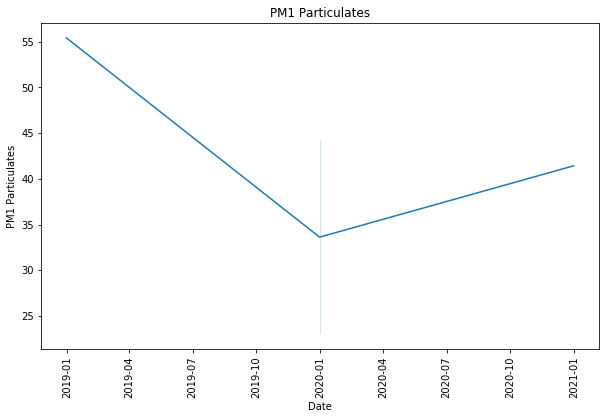

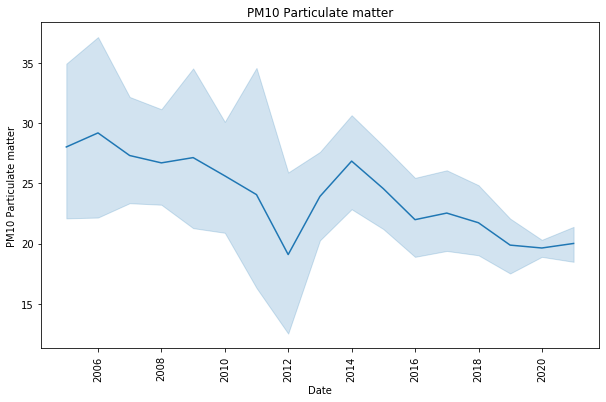

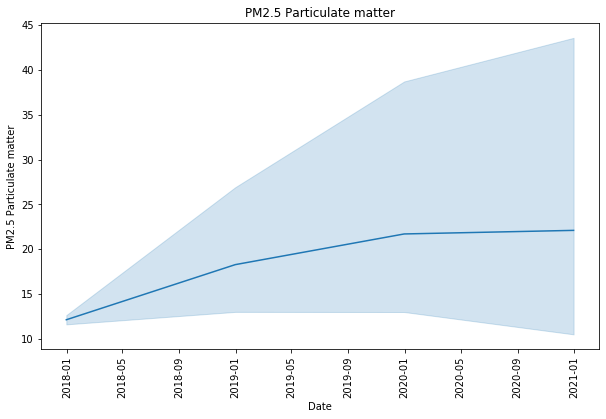

/Users/panchals/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1371: RuntimeWarning: All-NaN slice encountered
  overwrite_input=overwrite_input, interpolation=interpolation


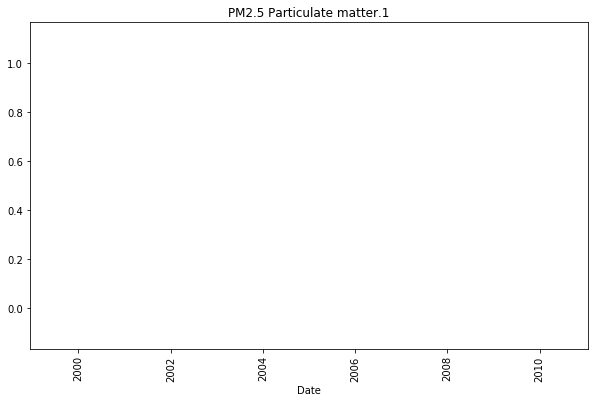

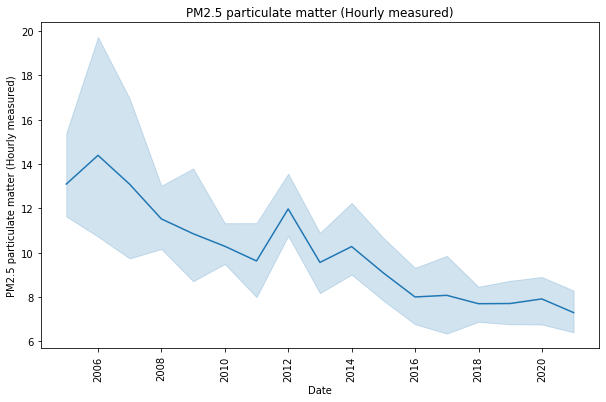

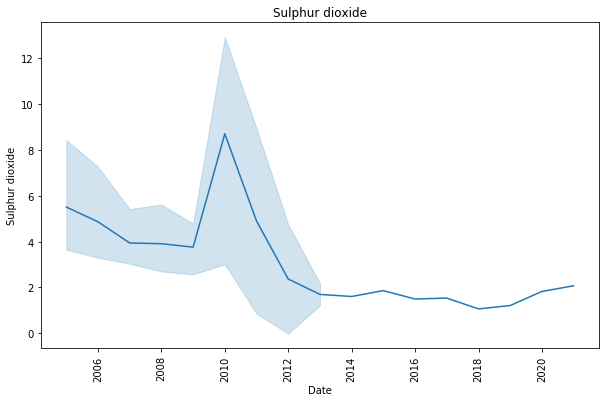

In [170]:
for p in pollutants:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p ,
                 x='Date',
                 data=df_yearly).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

### Dropping Pullutants with limited data

In [212]:
df_monthly = df_monthly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)
df_quaterly = df_quaterly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)

In [213]:
df_yearly = df_yearly.drop(['Non-volatile PM10', 
                            'Non-volatile PM2.5', 
                            'PM1 Particulates', 
                            'PM2.5 Particulate matter',
                            'PM2.5 Particulate matter.1',
                            'Volatile PM10'], axis = 1)
df_yearly.head()

Location       Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford 2004-12-31              NaN     19.366907   
1   Hounslow 2 - Cranford 2005-12-31              NaN     19.282252   
2   Hounslow 2 - Cranford 2006-12-31              NaN     16.322724   
3   Hounslow 2 - Cranford 2007-12-31              NaN     22.751626   
4   Hounslow 2 - Cranford 2008-12-31              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide  
0                                         NaN         3.611565  
1                                         NaN         3.959997  
2                                         NaN         3.018580  
3                                         NaN         2.886371  
4                                         NaN         3.046298

In [214]:
# df_yearly.to_csv("inner_yearly_agg.csv")

### Melting Pollutants into a single column

In [215]:
# boroughs = ['Heathrow', 'Ealing', 'Heathrow', 'Hillingdon', 'Richmond', 'Slough', 'Teddington']

In [216]:
poll_vars = df_monthly[['Location', 'Date']]
melted_daily = pd.melt(df_daily, id_vars=list(poll_vars.columns), value_vars = list(df_daily.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_monthly = pd.melt(df_monthly, id_vars=list(poll_vars.columns), value_vars = list(df_monthly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_quaterly = pd.melt(df_quaterly, id_vars=list(poll_vars.columns), value_vars = list(df_quaterly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_yearly = pd.melt(df_yearly, id_vars=list(poll_vars.columns), value_vars = list(df_yearly.drop(['Location', 'Date'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_yearly.head()

Location       Date        Pollutant  \
0   Hounslow 2 - Cranford 2004-12-31  Carbon monoxide   
1   Hounslow 2 - Cranford 2005-12-31  Carbon monoxide   
2   Hounslow 2 - Cranford 2006-12-31  Carbon monoxide   
3   Hounslow 2 - Cranford 2007-12-31  Carbon monoxide   
4   Hounslow 2 - Cranford 2008-12-31  Carbon monoxide   

   Indicator Value (R µg/m3)  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN

In [217]:
melted_yearly.Location.unique()

array([' Hounslow 2 - Cranford', ' Hounslow 4 - Chiswick High Road',
       ' Hounslow Brentford', ' Hounslow Feltham',
       ' Hounslow Gunnersbury', ' Hounslow Hatton Cross',
       ' Hounslow Heston Road', 'Ealing - Acton Town Hall',
       'Ealing - Acton Town Hall (Partisol)',
       'Ealing - Acton Town Hall FDMS', 'Ealing - Acton Vale ',
       'Ealing - Court Way', 'Ealing - Ealing Town Hall',
       'Ealing - Greenford', 'Ealing - Hanger Lane Gyratory',
       'Ealing - Southall', 'Ealing - Southall FDMS',
       'Ealing - Southall Railway', 'Ealing - Western Avenue',
       'Heathrow Bath Road', 'Heathrow Green Gates', 'Heathrow LHR2',
       'Heathrow Oaks Road', 'Hillingdon 2 - Hillingdon Hospital',
       'Hillingdon Harmondsworth', 'Hillingdon Harmondsworth Osiris',
       'Hillingdon Hayes', 'Hillingdon Oxford Avenue',
       'Hillingdon Sipson', 'Hillingdon South Ruislip',
       'Hounslow Boston Manor Park', 'Iver North Park Road',
       'Iver Primary School', 'Iver 

In [218]:
melted_yearly['Location']

0           Hounslow 2 - Cranford
1           Hounslow 2 - Cranford
2           Hounslow 2 - Cranford
3           Hounslow 2 - Cranford
4           Hounslow 2 - Cranford
                  ...            
4666    Slough Windmill Bath Road
4667     Spelthorne Sunbury Cross
4668     Spelthorne Sunbury Cross
4669     Spelthorne Sunbury Cross
4670     Spelthorne Sunbury Cross
Name: Location, Length: 4671, dtype: object

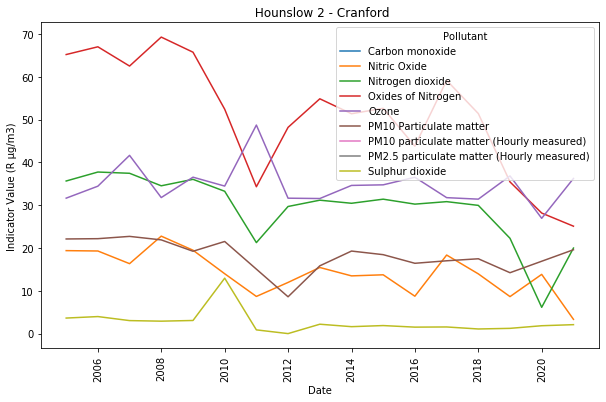

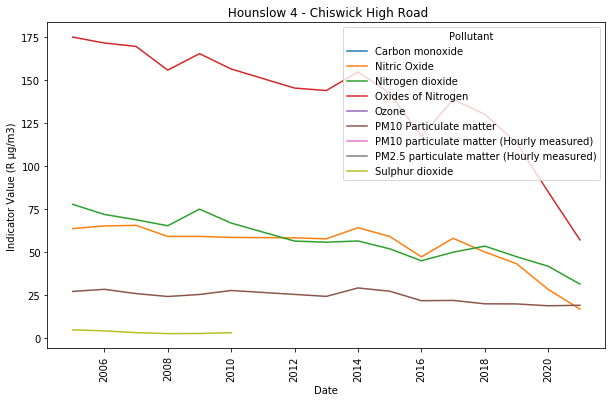

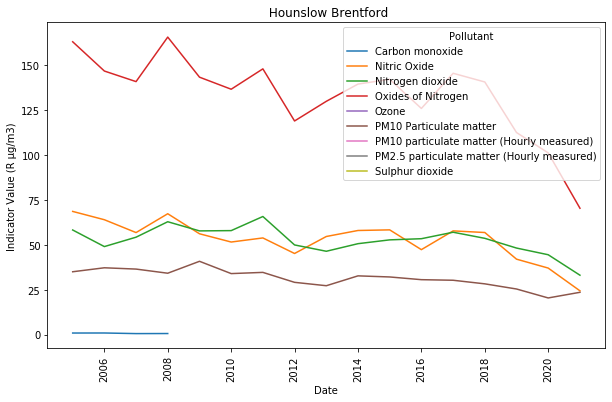

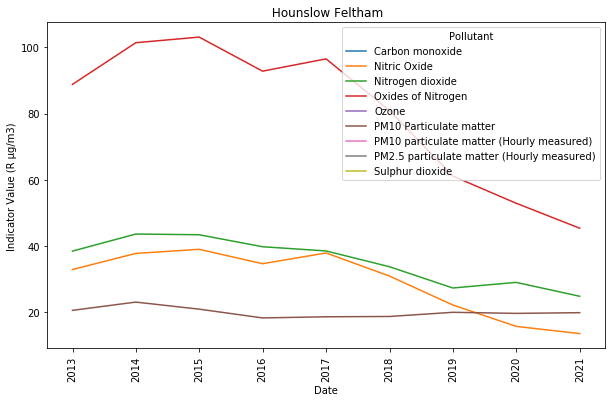

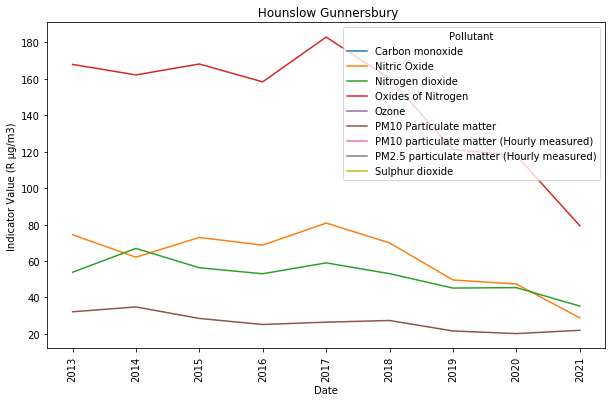

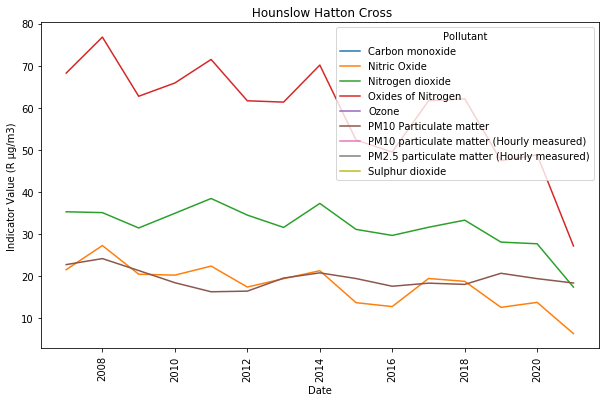

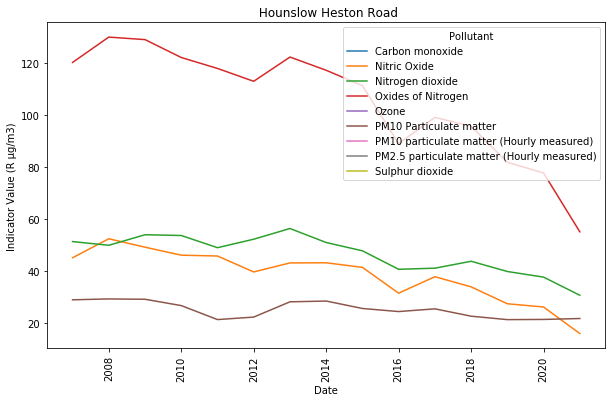

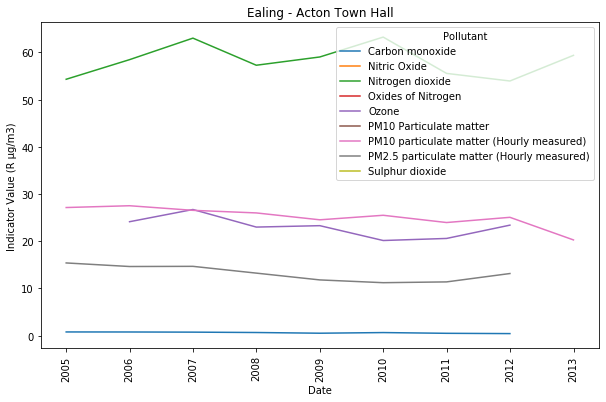

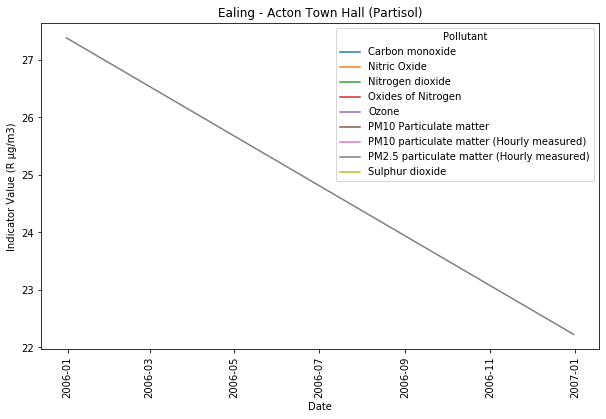

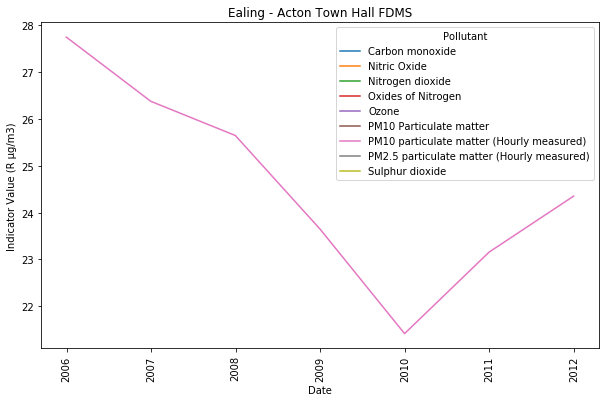

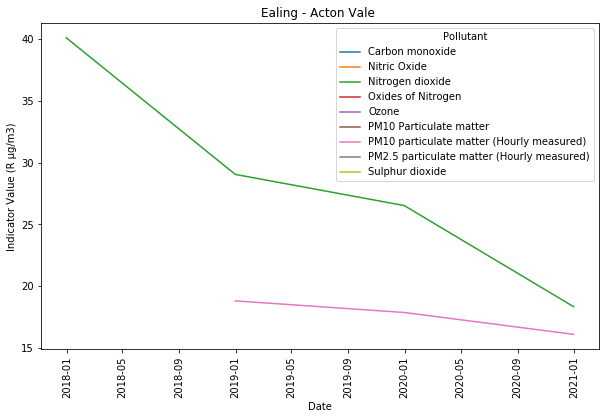

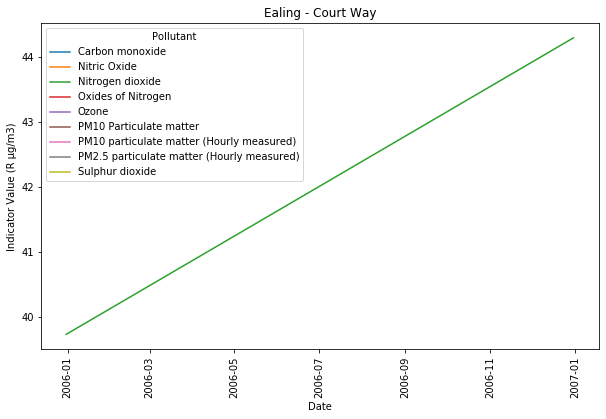

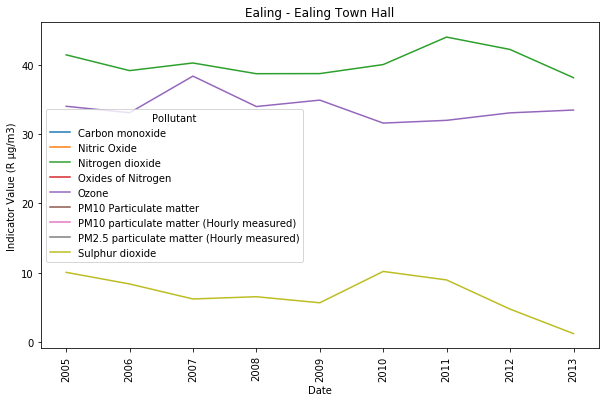

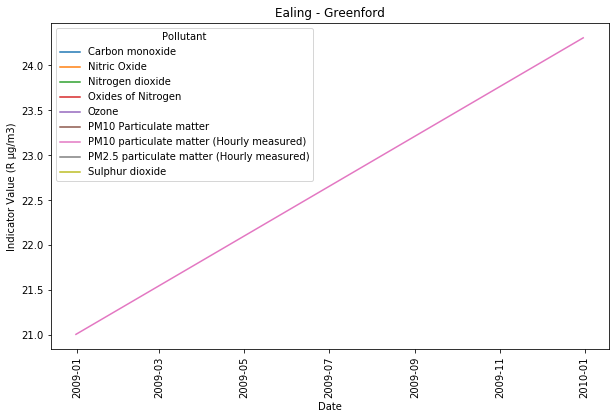

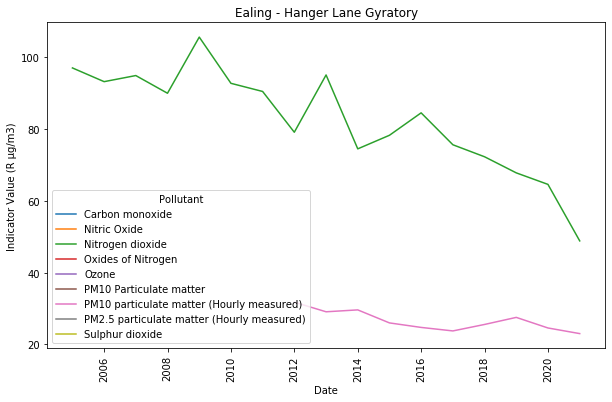

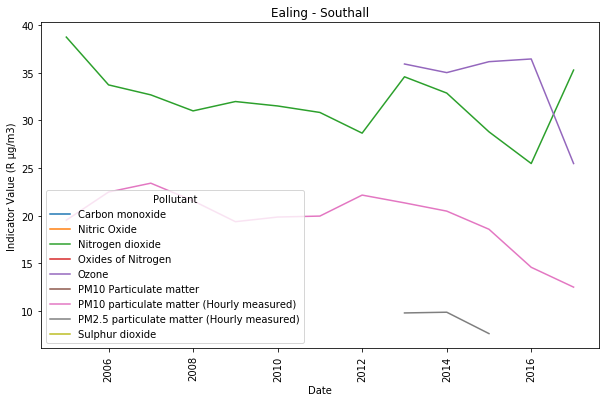

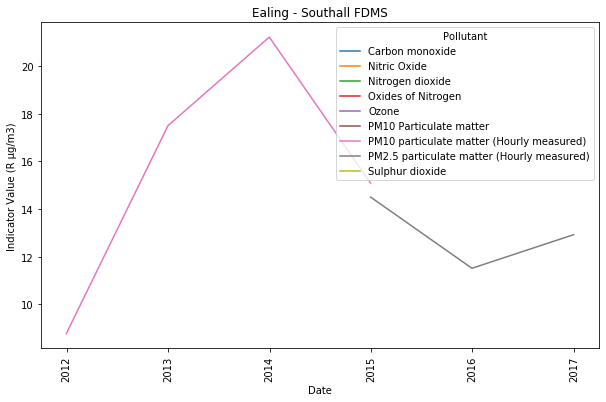

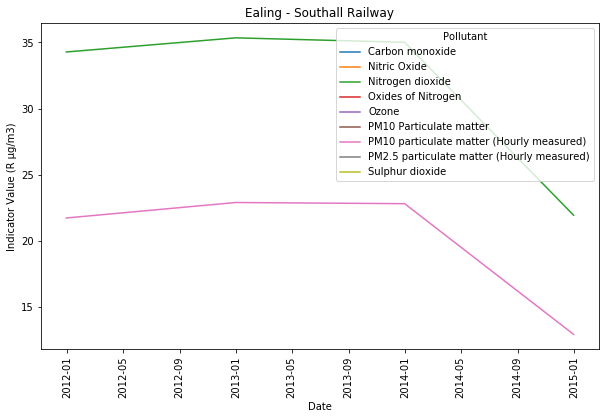

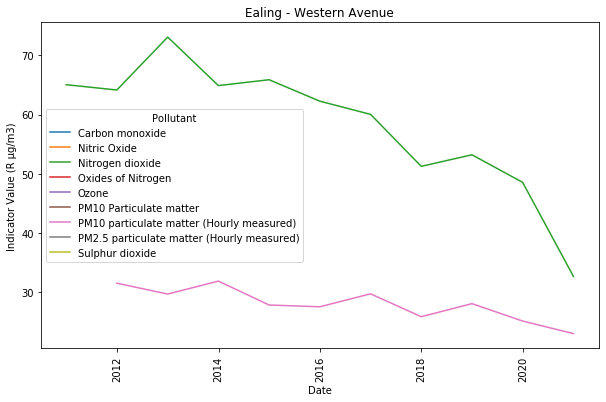

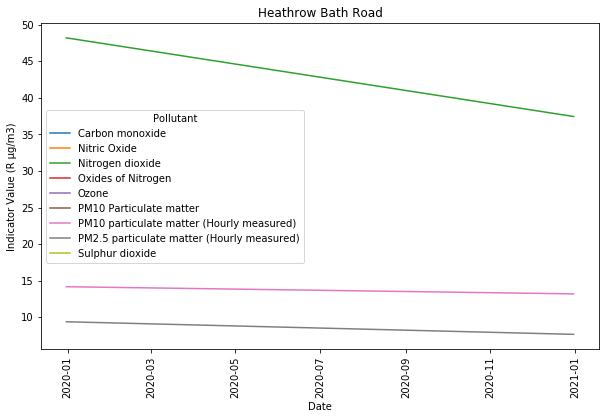

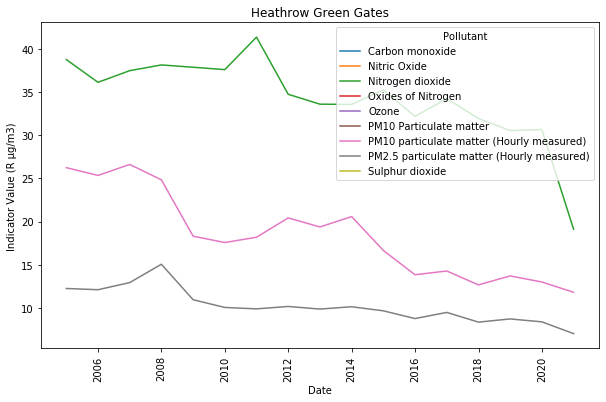

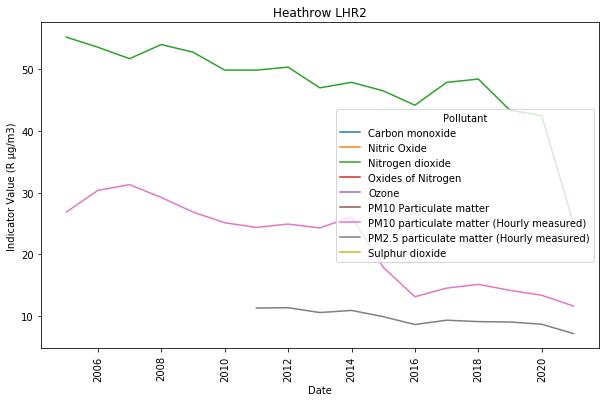

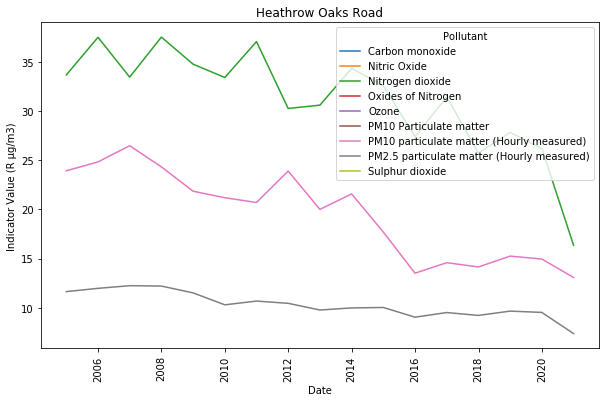

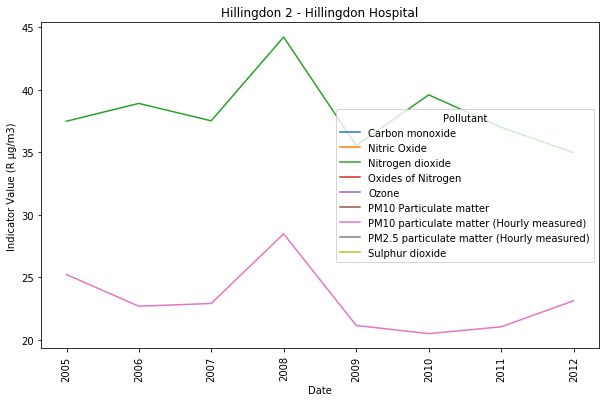

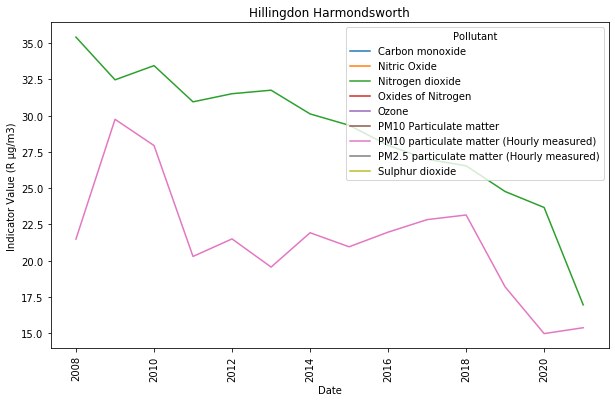

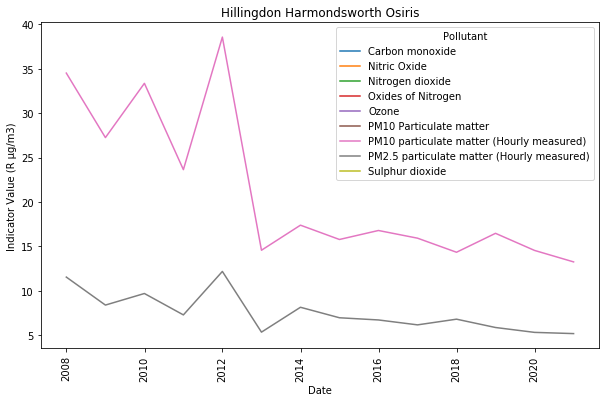

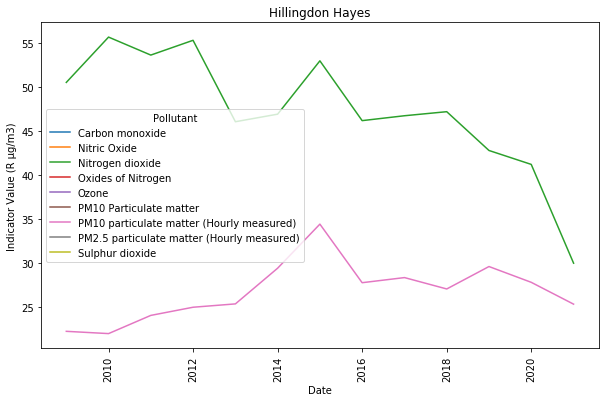

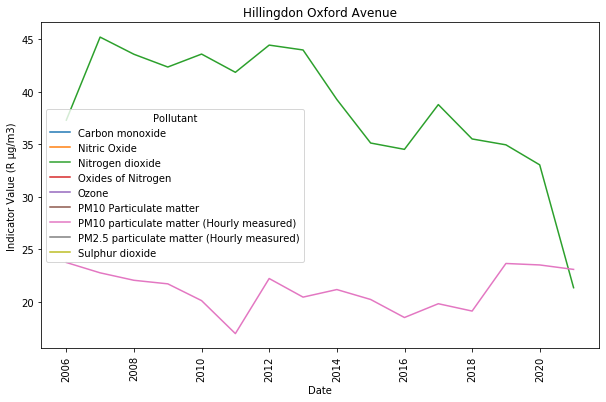

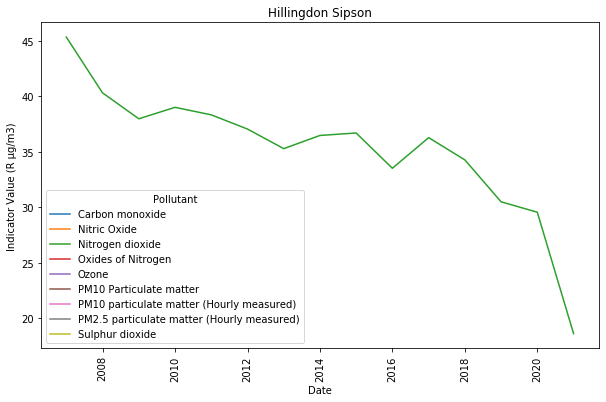

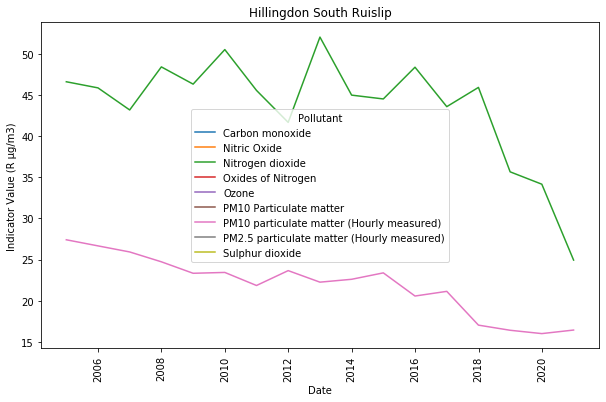

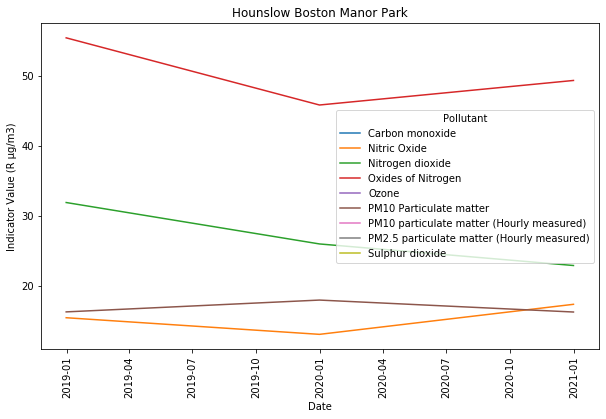

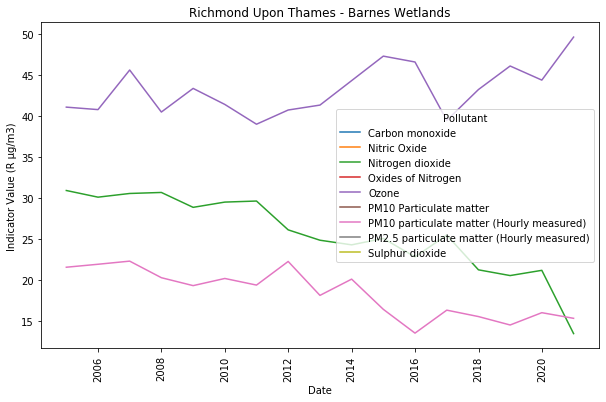

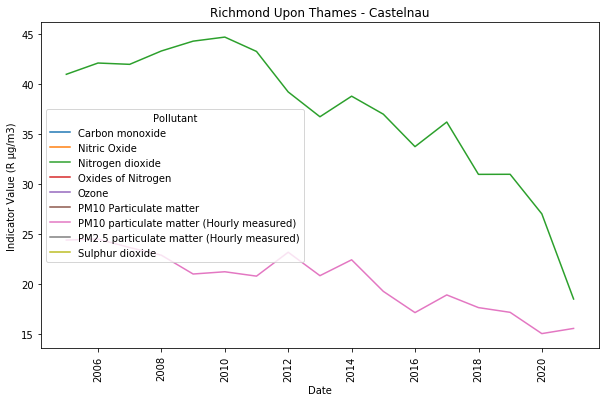

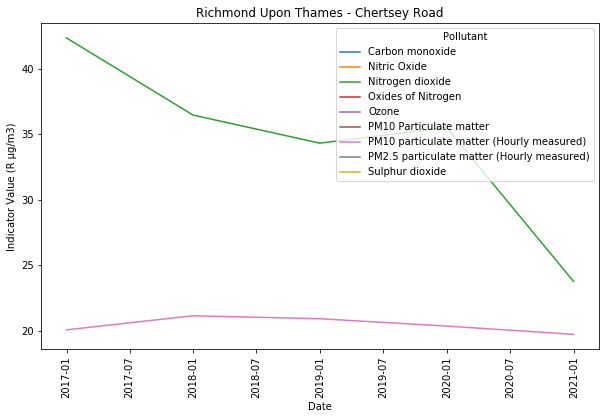

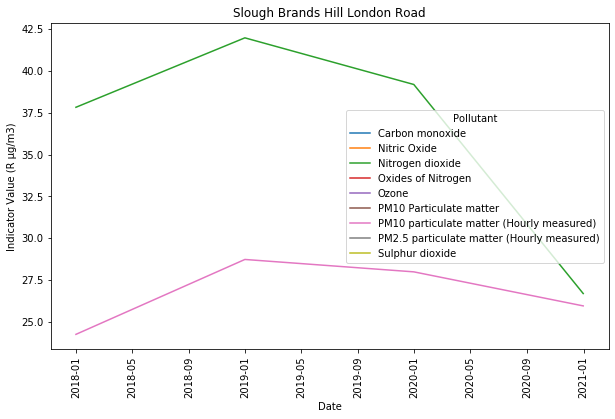

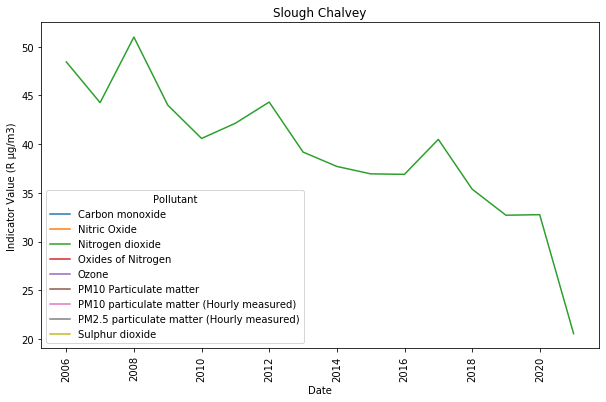

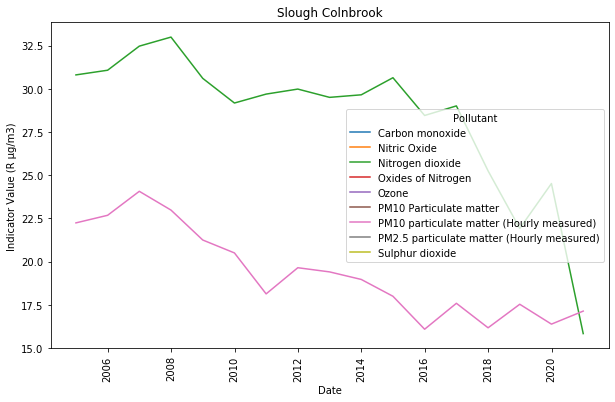

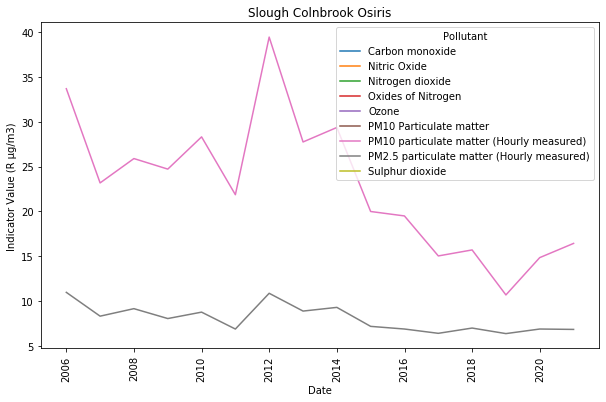

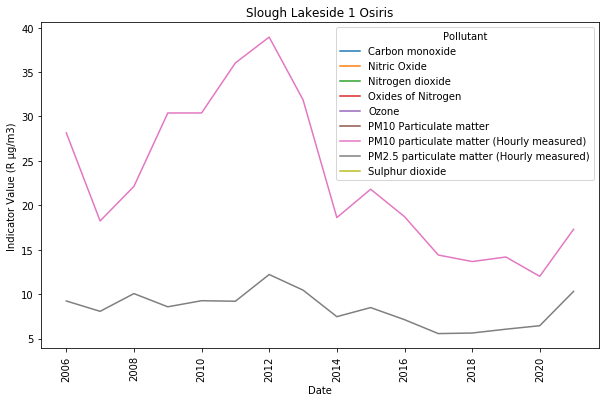

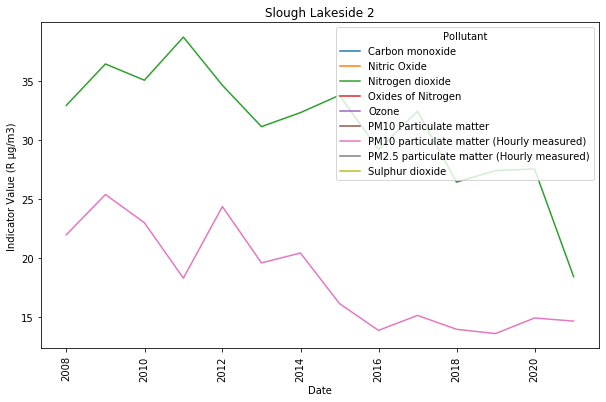

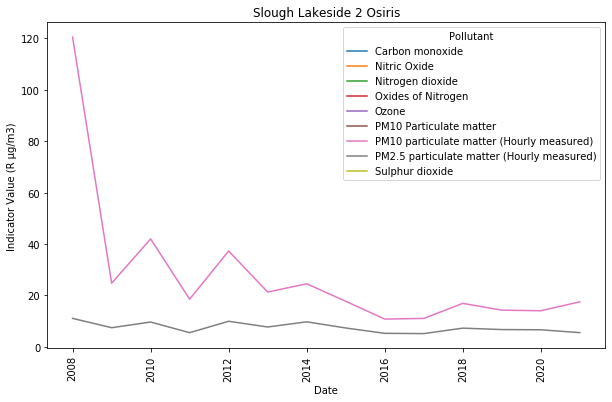

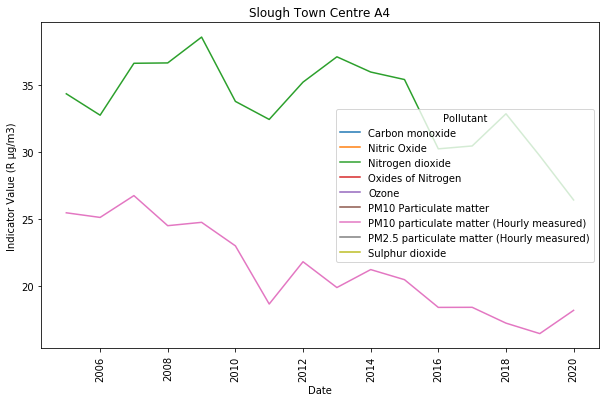

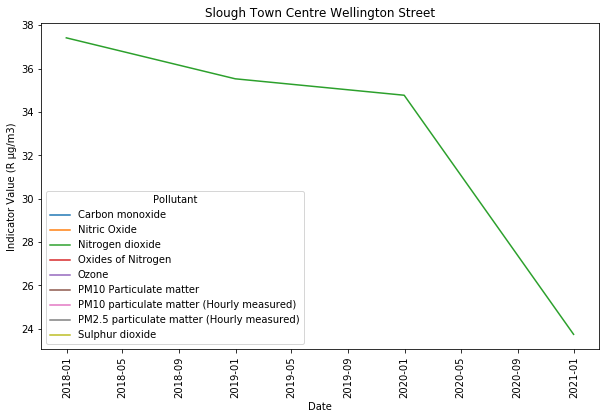

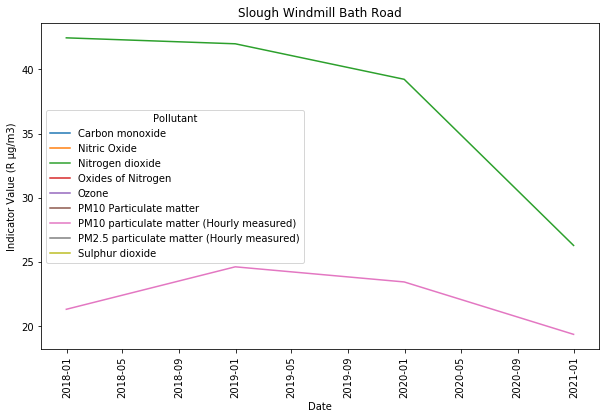

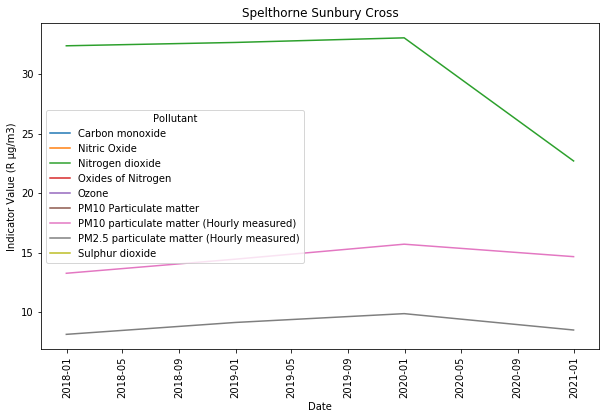

In [400]:
for l in melted_yearly['Location'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(y = 'Indicator Value (R µg/m3)' ,
                 x ='Date',
                 hue = 'Pollutant',
                 data = melted_yearly[melted_yearly['Location'] == l]).set_title(l)
    plt.xticks(rotation=90)
    plt.show()

### Mapping CCGs

In [248]:
len(list(melted_yearly.Location.unique()))

49

In [249]:
CCG = {'Hillingdon':['Hillingdon 2 - Hillingdon Hospital',
                     'Hillingdon Harmondsworth',
                     'Hillingdon Harmondsworth Osiris',
                     'Hillingdon Hayes',
                     'Hillingdon Oxford Avenue',
                     'Hillingdon Sipson',
                     'Hillingdon South Ruislip', 
                     'Heathrow LHR2', 
                     'Heathrow Bath Road', 
                     'Heathrow Green Gates'],
       'East Berkshire':['Slough Brands Hill London Road',
                         'Slough Chalvey', 
                         'Slough Colnbrook',
                         'Slough Colnbrook Osiris',
                         'Slough Lakeside 1 Osiris',
                         'Slough Lakeside 2',
                         'Slough Lakeside 2 Osiris',
                         'Slough Town Centre A4',
                         'Slough Town Centre Wellington Street',
                         'Slough Windmill Bath Road'],
       'Hounslow': [' Hounslow 2 - Cranford',
                    ' Hounslow 4 - Chiswick High Road',
                    ' Hounslow Brentford',
                    ' Hounslow Feltham',
                    ' Hounslow Gunnersbury',
                    ' Hounslow Hatton Cross',
                    ' Hounslow Heston Road',
                    'Hounslow Boston Manor Park'],
       'Ealing':['Ealing - Acton Town Hall',
                 'Ealing - Acton Town Hall (Partisol)',
                 'Ealing - Acton Town Hall FDMS',
                 'Ealing - Acton Vale ',
                 'Ealing - Court Way',
                 'Ealing - Ealing Town Hall',
                 'Ealing - Greenford',
                 'Ealing - Hanger Lane Gyratory',
                 'Ealing - Southall',
                 'Ealing - Southall FDMS',
                 'Ealing - Southall Railway',
                 'Ealing - Western Avenue'],
       'Surrey Heartlands': ['Spelthorne Sunbury Cross','Heathrow Oaks Road'],
       'South West London': ['Richmond Upon Thames - Barnes Wetlands',
                             'Richmond Upon Thames - Castelnau',
                             'Richmond Upon Thames - Chertsey Road',
                             'National Physical Laboratory, Teddington'],
       'Buckinghamshire': ['Iver North Park Road',
       'Iver Primary School', 'Iver Thorney Lane North']} 

In [250]:
sum([len(x) for x in CCG.values()])

49

In [251]:
def get_ccg(loc):
    for key, value in CCG.items():
        for v in value:
                if v == loc:
                    return key

In [252]:
df_yearly['CCG'] = df_yearly.apply(lambda row: get_ccg(row['Location']), axis = 1)

In [253]:
df_yearly.head()

Location       Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford 2004-12-31              NaN     19.366907   
1   Hounslow 2 - Cranford 2005-12-31              NaN     19.282252   
2   Hounslow 2 - Cranford 2006-12-31              NaN     16.322724   
3   Hounslow 2 - Cranford 2007-12-31              NaN     22.751626   
4   Hounslow 2 - Cranford 2008-12-31              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide       CCG  
0                                         NaN         3.611565  Hounslow  
1                                         NaN         3.959997  Hounslow  
2                                         NaN         3.018580  Hounslow  
3                                         NaN         2.886371  Hounslow  
4                                         NaN         3.046298  Hounslow

In [254]:
# df_yearly.to_csv("inner_yearly_agg.csv")

In [255]:
melted_yearly['CCG'] = melted_yearly.apply(lambda row: get_ccg(row['Location']), axis = 1)

In [256]:
melted_yearly.head()

Location       Date        Pollutant  \
0   Hounslow 2 - Cranford 2004-12-31  Carbon monoxide   
1   Hounslow 2 - Cranford 2005-12-31  Carbon monoxide   
2   Hounslow 2 - Cranford 2006-12-31  Carbon monoxide   
3   Hounslow 2 - Cranford 2007-12-31  Carbon monoxide   
4   Hounslow 2 - Cranford 2008-12-31  Carbon monoxide   

   Indicator Value (R µg/m3)       CCG  
0                        NaN  Hounslow  
1                        NaN  Hounslow  
2                        NaN  Hounslow  
3                        NaN  Hounslow  
4                        NaN  Hounslow

In [257]:
# melted_yearly.to_csv("melted_inner_yearly_agg.csv")

# Concating inner and outer pollution data

In [258]:
outer_poll = pd.read_csv('./yearlyOuterStacked.csv')
outer_poll

Date                    Location  Nitrogen dioxide      Ozone  \
0    2004-12-31                    Broadway         76.864912        NaN   
1    2004-12-31                 Brook Green         40.446501        NaN   
2    2004-12-31              Oxford High St         63.545897        NaN   
3    2004-12-31  Oxford St Ebbes (Cal Club)               NaN  40.376279   
4    2004-12-31            Watford Roadside         38.836547  37.226716   
..          ...                         ...               ...        ...   
113  2020-12-31              Oxford High St         28.006868        NaN   
114  2020-12-31  Oxford St Ebbes (Cal Club)               NaN  46.380779   
115  2020-12-31      Reading Caversham Road         24.945059        NaN   
116  2020-12-31         Reading Oxford Road         19.730862        NaN   
117  2020-12-31           Watford Town Hall         20.813022        NaN   

     PM10 particulate matter (Hourly measured)  \
0                                    29.886028   
1                                    22.430841   
2                                    27.789444   
3                                          NaN   
4                                          NaN   
..                                         ...   
113                                  15.914070   
114                                        NaN   
115                                  20.666082   
116                                  18.177858   
117                                  13.758945   

     PM2.5 particulate matter (Hourly measured)  Sulphur dioxide  \
0                                           NaN         9.171105   
1                                           NaN              NaN   
2                                           NaN              NaN   
3                                           NaN              NaN   
4                                           NaN              NaN   
..                                          ...              ...   
113                                         NaN              NaN   
114                                         NaN              NaN   
115                                         NaN              NaN   
116                                         NaN              NaN   
117                                    7.877282              NaN   

                        CCG  
0    Hammersmith and Fulham  
1    Hammersmith and Fulham  
2                    Oxford  
3                    Oxford  
4                   Watford  
..                      ...  
113                  Oxford  
114                  Oxford  
115                 Reading  
116                 Reading  
117                 Watford  

[118 rows x 8 columns]

In [259]:
pollution = pd.concat([df_yearly, outer_poll], ignore_index=True, sort=False)
pollution['Date'] = [str(x)[:4] for x in pollution['Date']]
pollution.head()

Location  Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford  2004              NaN     19.366907   
1   Hounslow 2 - Cranford  2005              NaN     19.282252   
2   Hounslow 2 - Cranford  2006              NaN     16.322724   
3   Hounslow 2 - Cranford  2007              NaN     22.751626   
4   Hounslow 2 - Cranford  2008              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide       CCG  
0                                         NaN         3.611565  Hounslow  
1                                         NaN         3.959997  Hounslow  
2                                         NaN         3.018580  Hounslow  
3                                         NaN         2.886371  Hounslow  
4                                         NaN         3.046298  Hounslow

In [260]:
# inner = ['Hounslow', 'Ealing', 'Surrey Heartlands', 'Hillingdon', 'South West London', 'East Berkshire', 'Buckinghamshire']

In [261]:
# in_out = []

# for l in pollution['CCG']:
#     if l in inner:
#         in_out.append('Inner')
#     else:
#         in_out.append('Outer')

In [523]:
# pollution['Radius'] = in_out
# pollution.head()

In [264]:
p_vars = pollution[['Location', 'Date', 'CCG']]
melted_pollution = pd.melt(pollution, id_vars=list(p_vars.columns), value_vars = list(pollution.drop(['Location', 'Date', 'CCG'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')
melted_pollution.head()

Location  Date       CCG        Pollutant  \
0   Hounslow 2 - Cranford  2004  Hounslow  Carbon monoxide   
1   Hounslow 2 - Cranford  2005  Hounslow  Carbon monoxide   
2   Hounslow 2 - Cranford  2006  Hounslow  Carbon monoxide   
3   Hounslow 2 - Cranford  2007  Hounslow  Carbon monoxide   
4   Hounslow 2 - Cranford  2008  Hounslow  Carbon monoxide   

  Indicator Value (R µg/m3)  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [265]:
df_yearly['CCG'].unique()

array(['Hounslow', 'Ealing', 'Hillingdon', 'Surrey Heartlands',
       'Buckinghamshire', 'South West London', 'East Berkshire'],
      dtype=object)

In [266]:
# in_out = []

# for l in melted_pollution['CCG']:
#     if l in inner:
#         in_out.append('Inner')
#     else:
#         in_out.append('Outer')

In [267]:
# melted_pollution['Radius'] = in_out
# melted_pollution.head()

Location  Date       CCG        Pollutant  \
0   Hounslow 2 - Cranford  2004  Hounslow  Carbon monoxide   
1   Hounslow 2 - Cranford  2005  Hounslow  Carbon monoxide   
2   Hounslow 2 - Cranford  2006  Hounslow  Carbon monoxide   
3   Hounslow 2 - Cranford  2007  Hounslow  Carbon monoxide   
4   Hounslow 2 - Cranford  2008  Hounslow  Carbon monoxide   

  Indicator Value (R µg/m3) Radius  
0                       NaN  Inner  
1                       NaN  Inner  
2                       NaN  Inner  
3                       NaN  Inner  
4                       NaN  Inner

## Aggregating by CCG

In [269]:
inner_ccg_agg = melted_yearly.groupby(["CCG",'Date',"Pollutant"]).mean().reset_index()
inner_ccg_agg.head(20)

CCG       Date                                   Pollutant  \
0   Buckinghamshire 2020-12-31                             Carbon monoxide   
1   Buckinghamshire 2020-12-31                                Nitric Oxide   
2   Buckinghamshire 2020-12-31                            Nitrogen dioxide   
3   Buckinghamshire 2020-12-31                          Oxides of Nitrogen   
4   Buckinghamshire 2020-12-31                                       Ozone   
5   Buckinghamshire 2020-12-31                     PM10 Particulate matter   
6   Buckinghamshire 2020-12-31   PM10 particulate matter (Hourly measured)   
7   Buckinghamshire 2020-12-31  PM2.5 particulate matter (Hourly measured)   
8   Buckinghamshire 2020-12-31                             Sulphur dioxide   
9            Ealing 2004-12-31                             Carbon monoxide   
10           Ealing 2004-12-31                                Nitric Oxide   
11           Ealing 2004-12-31                            Nitrogen dioxide   
12           Ealing 2004-12-31                          Oxides of Nitrogen   
13           Ealing 2004-12-31                                       Ozone   
14           Ealing 2004-12-31                     PM10 Particulate matter   
15           Ealing 2004-12-31   PM10 particulate matter (Hourly measured)   
16           Ealing 2004-12-31  PM2.5 particulate matter (Hourly measured)   
17           Ealing 2004-12-31                             Sulphur dioxide   
18           Ealing 2005-12-31                             Carbon monoxide   
19           Ealing 2005-12-31                                Nitric Oxide   

    Indicator Value (R µg/m3)  
0                    0.138750  
1                   33.781525  
2                   33.042030  
3                         NaN  
4                   49.984467  
5                   16.014508  
6                         NaN  
7                         NaN  
8                         NaN  
9                    0.770049  
10                        NaN  
11                  57.882938  
12                        NaN  
13                  33.992080  
14                        NaN  
15                  23.333576  
16                  15.391342  
17                  10.043232  
18                   0.762150  
19                        NaN

In [270]:
# inner_ccg_agg.to_csv("inner_ccg_agg.csv")

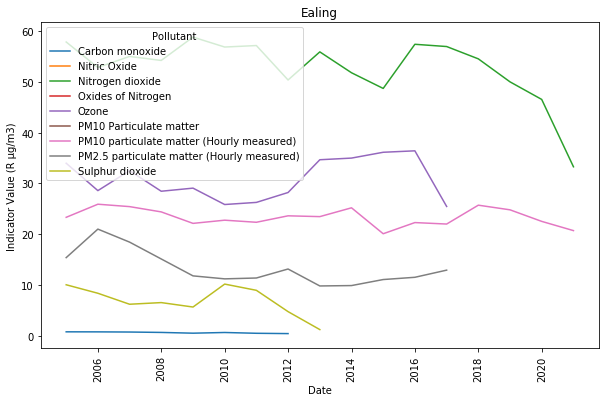

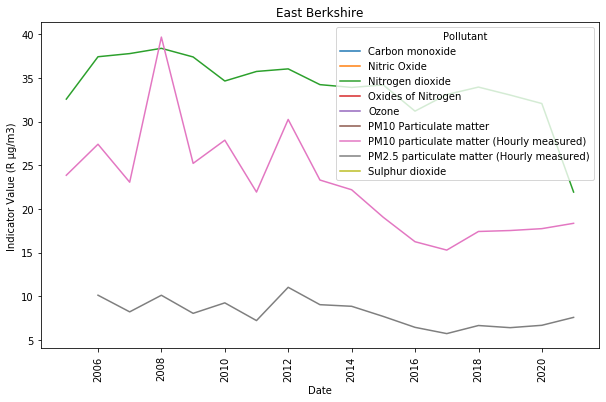

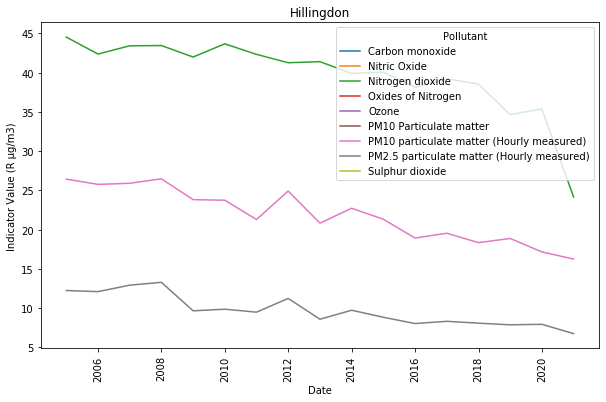

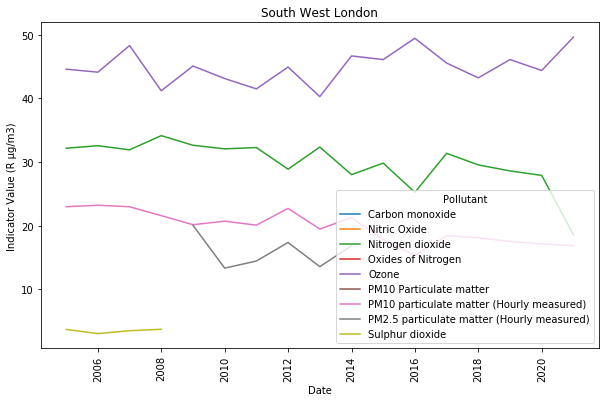

In [413]:
for l in inner_ccg_agg['CCG'].unique():
    plt.figure(figsize=(10, 6))
    sns.lineplot(y = 'Indicator Value (R µg/m3)' ,
                 x ='Date',
                 hue = 'Pollutant',
                 data = inner_ccg_agg[inner_ccg_agg['CCG'] == l]).set_title(l)
    plt.xticks(rotation=90)
    plt.show()

# Adding Lat-Long Values

In [341]:
# address = []
# for loc in pollution.Location.unique():
#     address.append(loc + ', UK') 

In [335]:
# import requests
# import urllib.parse

# address = 'Hillingdon 2 - Hillingdon Hospital, UK'
# url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'

# response = requests.get(url).json()
# print(response[0]["lat"])
# print(response[0]["lon"])

In [480]:
# import requests
# import urllib.parse

# # address = ['Hillingdon 2 - Hillingdon Hospital, UK','Hillingdon Harmondsworth, UK']
# lat_long = []

# for address in pollution.Location:
#     url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address + ', UK') +'?format=json'
#     response = requests.get(url).json()
#     if len(response) != 0:
#         lat_long.append([response[0]["lat"],response[0]["lon"]])
#     else: 
#         lat_long.append([np.nan, np.nan])

In [399]:
len(pollution)

637

In [400]:
# pollution['lat/long'] = lat_long
# pollution

In [450]:
nan_loc = pollution[pollution['lat/long'].apply(lambda x: 'nan' in str(x))]

In [451]:
nan_loc.Location.unique()

array(['Ealing - Acton Town Hall (Partisol)', 'Slough Colnbrook'],
      dtype=object)

In [452]:
ll = {' Hounslow Gunnersbury': [51.500676, -0.284383],
      ' Hounslow 4 - Chiswick High Road': [ 51.492507, -0.257252],
      ' Hounslow Hatton Cross': [51.463402, -0.427525],
      'Ealing - Acton Town Hall (Partisol)': [45.322950, -84.552450],
      'Ealing - Acton Town Hall': [45.322950, -84.552450],
      'Ealing - Acton Town Hall FDMS': [45.322948, -84.552452],
      'Ealing - Hanger Lane Gyratory':[51.53088277, -0.2925534],
      'Ealing - Southall FDMS':[51.50659726, -0.35425232],
      'Heathrow Green Gates': [51.481478, -0.486675],
      'Heathrow LHR2': [51.479167, -0.440556],
      'Hillingdon Harmondsworth': [51.487989, -0.480984],
      'Hillingdon Harmondsworth Osiris': [51.487534, -0.479451],
      'Hillingdon Oxford Avenue': [51.481130, -0.423760],
      'Hillingdon Sipson': [51.484384, -0.455695],
      'Hounslow Boston Manor Park': [51.4896481, -0.31872439],
      'Iver Thorney Lane North': [51.519876, -0.503680],
      'Richmond Upon Thames - Barnes Wetlands': [51.4768236, -0.2354815],
      'Richmond Upon Thames - Castelnau': [51.48132301, -0.236664515],
      'Richmond Upon Thames - Chertsey Road': [51.45203867, -0.345765758],
      'Slough Brands Hill London Road': [51.489590, -0.537391],
      'Slough Colnbrook': [51.48403276, -0.525212056],
      'Slough Colnbrook Osiris': [51.480973, -0.510398],
      'Slough Lakeside 1 Osiris':[51.484326, -0.508500],
      'Slough Lakeside 2': [51.487764, -0.502656],
      'Slough Lakeside 2 Osiris': [51.487764, -0.502656],
      'Slough Town Centre Wellington Street': [51.508633, -0.583296],
      'Slough Windmill Bath Road': [51.512230, -0.610393],
      'Spelthorne Sunbury Cross': [51.420250, -0.418515],
      'Oxford St Ebbes (Cal Club)': [51.744856, -1.260338],
      'Watford Roadside': [51.6549844, -0.391508358],
      'H&F Hammersmith Town Centre': [51.492695, -0.224787]}

In [453]:
pollution['lat/long'] = pollution['Location'].map(ll).fillna(pollution['lat/long'])

In [454]:
pollution.head()

Location  Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford  2004              NaN     19.366907   
1   Hounslow 2 - Cranford  2005              NaN     19.282252   
2   Hounslow 2 - Cranford  2006              NaN     16.322724   
3   Hounslow 2 - Cranford  2007              NaN     22.751626   
4   Hounslow 2 - Cranford  2008              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide       CCG  \
0                                         NaN         3.611565  Hounslow   
1                                         NaN         3.959997  Hounslow   
2                                         NaN         3.018580  Hounslow   
3                                         NaN         2.886371  Hounslow   
4                                         NaN         3.046298  Hounslow   

  Radius                  lat/long  
0  Inner  [51.4686132, -0.3613471]  
1  Inner  [51.4686132, -0.3613471]  
2  Inner  [51.4686132, -0.3613471]  
3  Inner  [51.4686132, -0.3613471]  
4  Inner  [51.4686132, -0.3613471]

In [455]:
list(pollution.columns)

['Location',
 'Date',
 'Carbon monoxide',
 'Nitric Oxide',
 'Nitrogen dioxide',
 'Oxides of Nitrogen',
 'Ozone',
 'PM10 Particulate matter',
 'PM10 particulate matter (Hourly measured)',
 'PM2.5 particulate matter (Hourly measured)',
 'Sulphur dioxide',
 'CCG',
 'Radius',
 'lat/long']

## Calculating distance from Heathrow

In [440]:
import sys
!{sys.executable} -m pip install haversine

In [513]:
import haversine as hs

In [514]:
heathrow_loc = (51.47002, -0.454295)

In [515]:
distance = []
for l in pollution['lat/long']:
    r_l = []
    for c in l:
        r_l.append(float(c))
    distance.append(r_l)   

In [516]:
pollution['lat/long'] = distance

In [517]:
distance = []
for coord in pollution['lat/long']:
    distance.append(hs.haversine(coord,heathrow_loc))

In [518]:
pollution['distance_from_LHR'] = distance

In [520]:
pollution.head()

Location  Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford  2004              NaN     19.366907   
1   Hounslow 2 - Cranford  2005              NaN     19.282252   
2   Hounslow 2 - Cranford  2006              NaN     16.322724   
3   Hounslow 2 - Cranford  2007              NaN     22.751626   
4   Hounslow 2 - Cranford  2008              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide       CCG  \
0                                         NaN         3.611565  Hounslow   
1                                         NaN         3.959997  Hounslow   
2                                         NaN         3.018580  Hounslow   
3                                         NaN         2.886371  Hounslow   
4                                         NaN         3.046298  Hounslow   

  Radius                  lat/long  distance_from_LHR  
0  Inner  [51.4686132, -0.3613471]           6.440137  
1  Inner  [51.4686132, -0.3613471]           6.440137  
2  Inner  [51.4686132, -0.3613471]           6.440137  
3  Inner  [51.4686132, -0.3613471]           6.440137  
4  Inner  [51.4686132, -0.3613471]           6.440137

## Classifying Radius of Monitoring Station

In [521]:
in_out = []

for d in pollution['distance_from_LHR']:
    if d < 15.0:
        in_out.append('Inner')
    else:
        in_out.append('Outer')

In [522]:
pollution['Radius'] = in_out
pollution.head()

Location  Date  Carbon monoxide  Nitric Oxide  \
0   Hounslow 2 - Cranford  2004              NaN     19.366907   
1   Hounslow 2 - Cranford  2005              NaN     19.282252   
2   Hounslow 2 - Cranford  2006              NaN     16.322724   
3   Hounslow 2 - Cranford  2007              NaN     22.751626   
4   Hounslow 2 - Cranford  2008              NaN     19.463412   

   Nitrogen dioxide  Oxides of Nitrogen      Ozone  PM10 Particulate matter  \
0         35.637110           65.183649  31.628426                22.091612   
1         37.730687           66.993132  34.426010                22.159977   
2         37.439653           62.493307  41.626836                22.695308   
3         34.516199           69.260681  31.764437                21.877800   
4         36.025263           65.728967  36.527434                19.221030   

   PM10 particulate matter (Hourly measured)  \
0                                        NaN   
1                                        NaN   
2                                        NaN   
3                                        NaN   
4                                        NaN   

   PM2.5 particulate matter (Hourly measured)  Sulphur dioxide       CCG  \
0                                         NaN         3.611565  Hounslow   
1                                         NaN         3.959997  Hounslow   
2                                         NaN         3.018580  Hounslow   
3                                         NaN         2.886371  Hounslow   
4                                         NaN         3.046298  Hounslow   

  Radius                  lat/long  distance_from_LHR  
0  Inner  [51.4686132, -0.3613471]           6.440137  
1  Inner  [51.4686132, -0.3613471]           6.440137  
2  Inner  [51.4686132, -0.3613471]           6.440137  
3  Inner  [51.4686132, -0.3613471]           6.440137  
4  Inner  [51.4686132, -0.3613471]           6.440137

In [525]:
# pollution.to_csv("complete_pollution.csv")

In [526]:
# pollution.to_csv("../data_final/pollution_wide.csv")

In [529]:
poll_vars = pollution[['Location', 'Date', 'CCG', 'Radius', 'lat/long', 'distance_from_LHR']]
melted_pollution = pd.melt(pollution, id_vars=list(poll_vars.columns), value_vars = list(pollution.drop(['Location', 'Date', 'CCG', 'Radius', 'lat/long', 'distance_from_LHR'], axis = 1)), var_name = 'Pollutant', value_name = 'Indicator Value (R µg/m3)')

In [532]:
# melted_pollution.to_csv("../data_final/pollution.csv")

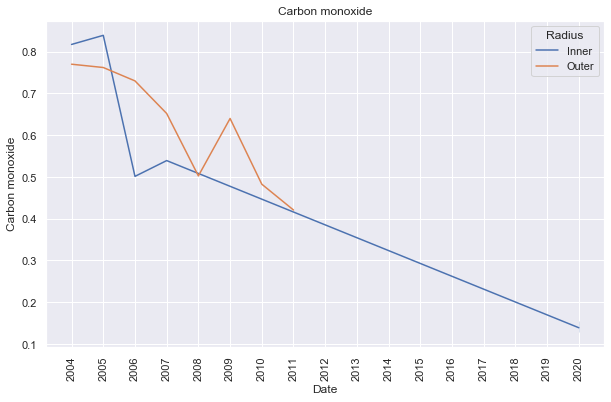

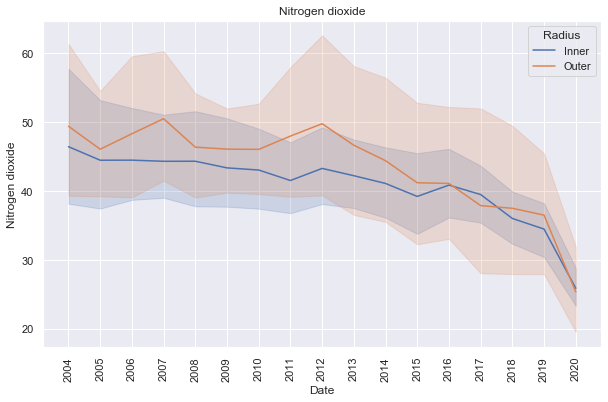

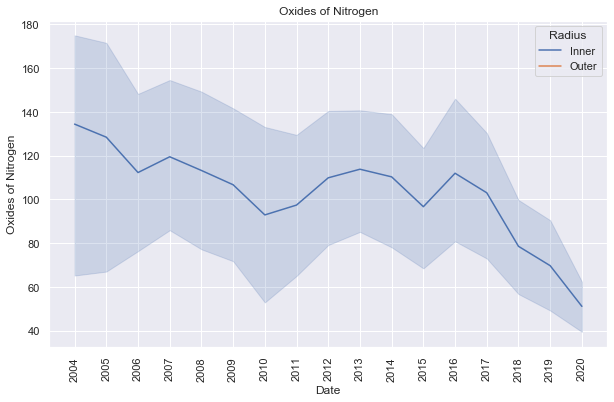

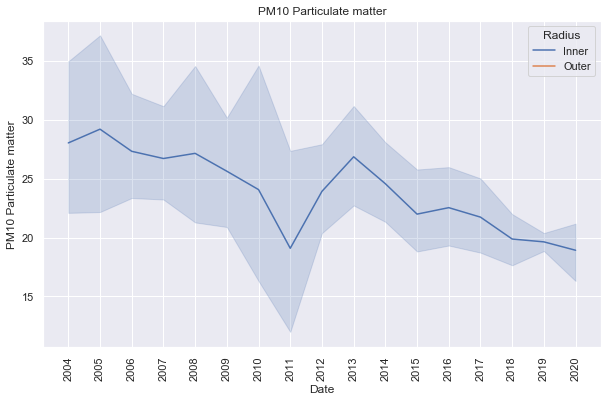

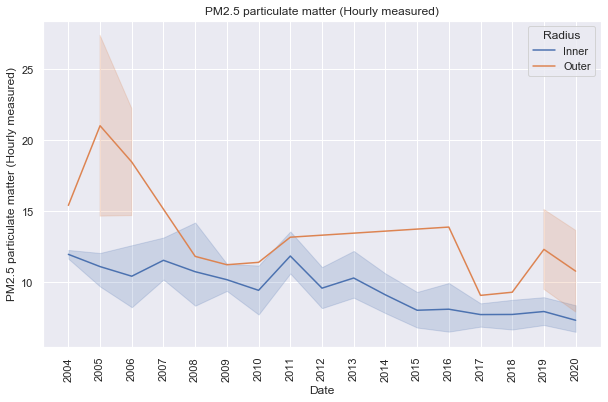

In [534]:
all_polls = list(pollution.drop(['Location', 'Date', 'CCG', 'Radius', 'lat/long', 'distance_from_LHR'], axis = 1).columns)


for p in all_polls:
    plt.figure(figsize=(10, 6))
    sns.lineplot(y= p,
                 x='Date',
                 hue = 'Radius',
                 data=pollution).set_title(p)
    plt.xticks(rotation=90)
    plt.show()

In [244]:
# lets make a correlation heatmap matrix!
sns.set(rc={'figure.figsize':(12,9)})

cmap= sns.diverging_palette(240, 10, as_cmap=True)

pollution_corr = pollution.corr()
sns.heatmap(pollution_corr, cmap=cmap)

plt.title('Correlation Heatmap of pollution indicators in relation to one another')
plt.show()

## Looking into legal exceedance values

The annual mean concentration of NO2 must not exceed 40 µg/m3 and that there should be no more than 18 exceedances of the hourly mean limit value (concentrations above 200 µg/m3) in a single year.

An annual average of 40 µg/m3 for PM10;


A 24-hour average of 50 µg/m3 more than 35 times in a single year for PM10;


An annual average of 25 µg/m3 for PM2.5.


3-year average of 8-hour mean concentrations of O3 should not exceed 120 µg/m3 more than 25 times.


### Air Quality Standards Regulations 2010

Running 8-hourly mean  µg/m3

|Pollutant | 1 | 2 | 3 | 4 | 5 | 6 | 7|8|9|10|
|---:|:-----|:-----------|:----|:---|:---|:--|:--|:--|:--|:---|
|O3 |0 - 33|34 - 66|67 - 100|101 - 120|121 - 140|141 - 160|161 - 187|188 - 213|214 - 240|241<|
|NO2|0 - 67|68 - 134|135 - 200|201 - 267|268 - 334|335 - 400|401 - 467|468 - 534|535 - 600|601<|
|SO2|0 - 88|89 - 177|178 - 266|267 - 354|355 - 443|444 - 532|533 - 710|711 - 887|888-1064|1065 <|
|PM2.5|0 - 11|12 - 23|24 - 35|36 - 41|42 - 47|48 - 53|54 - 58|59 - 64|65 - 70|71<|
|PM10|0 - 16|17 - 33|34 - 50|51 - 58|59 - 66|67 - 75|76 - 83|84 - 91|92 - 100|101<|

In [31]:
(melted_yearly[['Pollutant','Indicator Value (R µg/m3)']])

Pollutant  Indicator Value (R µg/m3)
0     Carbon monoxide                        NaN
1     Carbon monoxide                        NaN
2     Carbon monoxide                        NaN
3     Carbon monoxide                        NaN
4     Carbon monoxide                        NaN
...               ...                        ...
4639  Sulphur dioxide                        NaN
4640  Sulphur dioxide                        NaN
4641  Sulphur dioxide                        NaN
4642  Sulphur dioxide                        NaN
4643  Sulphur dioxide                        NaN

[4644 rows x 2 columns]

In [32]:
exposure = []

for poll, value in [melted_yearly[['Pollutant','Indicator Value (R µg/m3)']]]:
        exposure.append(value)

In [499]:
exposure = []

for poll, value in melted_yearly[['Pollutant','Indicator Value (R µg/m3)']]:
    if poll == "Ozone":
    if value <= 33.00:
        exposure.append(1)
    elif 33.00 < value <= 66.00:
        exposure.append(2)
    elif 66.00 < value <= 100.00:
        exposure.append(3)
    elif 100.00 < value <= 120.00:
        exposure.append(4)
    elif 120.00 < value <= 140.00:
        exposure.append(5)
    elif 140.00 < value <= 160.00:
        exposure.append(6)
    elif 160.00 < value <= 187.00:
        exposure.append(7)
    elif 187.00 < value <= 213.00:
        exposure.append(8)
    elif 213.00 < value <= 240.00:
        exposure.append(9)
    elif 240.00 < value:
        exposure.append(10)
    else:
        exposure.append(np.nan)
    

In [475]:
exposure = []
for pollutant in melted_daily['Pollutant'].unique():
    for value in melted_daily['Indicator Value (R µg/m3)']:
        if pollutant == 'Ozone':
            if value <= 33.00:
                exposure.append(1)
            elif 33.00 < value <= 66.00:
                exposure.append(2)
            elif 66.00 < value <= 100.00:
                exposure.append(3)
            elif 100.00 < value <= 120.00:
                exposure.append(4)
            elif 120.00 < value <= 140.00:
                exposure.append(5)
            elif 140.00 < value <= 160.00:
                exposure.append(6)
            elif 160.00 < value <= 187.00:
                exposure.append(7)
            elif 187.00 < value <= 213.00:
                exposure.append(8)
            elif 213.00 < value <= 240.00:
                exposure.append(9)
            elif 240.00 < value:
                exposure.append(10)
            else:
                exposure.append(np.nan)
                
        elif pollutant == 'Nitrogen dioxide':
            if value <= 67.00:
                exposure.append(1)
            elif 67.00 < value <= 134.00:
                exposure.append(2)
            elif 134.00 < value <= 200.00:
                exposure.append(3)
            elif 200.00 < value <= 267.00:
                exposure.append(4)
            elif 267.00 < value <= 334.00:
                exposure.append(5)
            elif 334.00 < value <= 400.00:
                exposure.append(6)
            elif 400.00 < value <= 467.00:
                exposure.append(7)
            elif 467.00 < value <= 534.00:
                exposure.append(8)
            elif 534.00 < value <= 600.00:
                exposure.append(9)
            elif 600.00 < value:
                exposure.append(10)
            else:
                exposure.append(np.nan)
                
        elif pollutant == 'Sulphur dioxide':
            if value <= 88.00:
                exposure.append(1)
            elif 88.00 < value <= 177.00:
                exposure.append(2)
            elif 177.00 < value <= 266.00:
                exposure.append(3)
            elif 266.00 < value <= 354.00:
                exposure.append(4)
            elif 354.00 < value <= 443.00:
                exposure.append(5)
            elif 443.00 < value <= 532.00:
                exposure.append(6)
            elif 532.00 < value <= 710.00:
                exposure.append(7)
            elif 710.00 < value <= 887.00:
                exposure.append(8)
            elif 887.00 < value <= 1064.00:
                exposure.append(9)
            elif 1064.00 < value:
                exposure.append(10)
            else:
                exposure.append(np.nan)
            
        elif "PM2.5" in pollutant:
            if value <= 11.00:
                exposure.append(1)
            elif 11.00 < value <= 23.00:
                exposure.append(2)
            elif 23.00 < value <= 35.00:
                exposure.append(3)
            elif 35.00 < value <= 41.00:
                exposure.append(4)
            elif 41.00 < value <= 47.00:
                exposure.append(5)
            elif 47.00 < value <= 53.00:
                exposure.append(6)
            elif 53.00 < value <= 58.00:
                exposure.append(7)
            elif 58.00 < value <= 64.00:
                exposure.append(8)
            elif 64.00 < value <= 70.00:
                exposure.append(9)
            elif 70.00 < value:
                exposure.append(10)
            else:
                exposure.append(np.nan)
                
        elif "PM10" in pollutant:
            if value <= 16.00:
                exposure.append(1)
            elif 16.00 < value <= 33.00:
                exposure.append(2)
            elif 33.00 < value <= 50.00:
                exposure.append(3)
            elif 50.00 < value <= 58.00:
                exposure.append(4)
            elif 58.00 < value <= 66.00:
                exposure.append(5)
            elif 66.00 < value <= 75.00:
                exposure.append(6)
            elif 75.00 < value <= 83.00:
                exposure.append(7)
            elif 83.00 < value <= 91.00:
                exposure.append(8)
            elif 91.00 < value <= 100.00:
                exposure.append(9)
            elif 100.00 < value:
                exposure.append(10)
            else:
                exposure.append(np.nan)
        
        else:
            exposure.append(np.nan)


# melted_daily['Index Level'] = exposure

### Air Quality Standards Regulations 2010

Running 8-hourly mean  µg/m3

|Pollutant | 1 | 2 | 3 | 4 | 5 | 6 | 7|8|9|10|
|---:|:-----|:-----------|:----|:---|:---|:--|:--|:--|:--|:---|
|O3 |0 - 33|34 - 66|67 - 100|101 - 120|121 - 140|141 - 160|161 - 187|188 - 213|214 - 240|241<|
|NO2|0 - 67|68 - 134|135 - 200|201 - 267|268 - 334|335 - 400|401 - 467|468 - 534|535 - 600|601<|
|SO2|0 - 88|89 - 177|178 - 266|267 - 354|355 - 443|444 - 532|533 - 710|711 - 887|888-1064|1065 <|
|PM2.5|0 - 11|12 - 23|24 - 35|36 - 41|42 - 47|48 - 53|54 - 58|59 - 64|65 - 70|71<|
|PM10|0 - 16|17 - 33|34 - 50|51 - 58|59 - 66|67 - 75|76 - 83|84 - 91|92 - 100|101<|

In [476]:
len(exposure)

39593700

In [477]:
len(melted_daily)

2639580